<a href="https://colab.research.google.com/github/venkateshtantravahi/CNN-Architectures/blob/main/LeNet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Understanding and Implementation of LeNet-5 CNN Architecture__

# Agenda of this nootebook

- Understanding of components within a convolutional network
- Key definitions of terms commonly used in deep learning and machine learning
- Understanding of LeNet-5 as presented in the original research paper
- Implementation of a neual network using Tensorflow and keras


[LeNet-5 Paper](http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf)

# Convolutional Neural Network

Convolutional Neural Network is the standard form of neural network architecture for solving taks associated with computer vision such as face detection, face recognition, pose estimation and more with some variants in the CNN architectures.

A few characteristics of the CNN architecture makes them more favourable in computer tasks.The main characters that makes the CNN architectures robust are:

- Local Reciptive Fields
- Sub-Sampling
- Weight Sharing



# Local Reciptive Fields

First let dive with some basic things and I will summarise the definition of __local reciptive fields__ in the end.

But more importantly, each neuron within a CNN is responsible for a defined region of the input data, and this enables neurons to learn patterns such as lines, edges, and small details that make up the image.

This defined region of space that a neuron or unit is exposed to in in the input data is called the __Local Receptive Field__.

## Receptive Fields

Receptive fileds are defined portion of space or spatial construct containing units that provide input to a set of units within a corresponding layer.

The receptive filed is defined by the filter size of a layer within a cnn.The receptive filed is also an indication of the extent of the scope of input data a neuron or unit within a layer can be exposed to

### Definition:
_The local receptive field is a defined segmented area that is occupied by the content of input data that a neuron within a convolutional layer is exposed to during the process of convolution._

# SubSampling 

Sub-sampling is a technique that has been deviced to reduce the reliance of precise positioning within feature maps that are produced by convolutional layer within a CNN.

So, the information that matters in terms of positioning of features is the relative position of a feature to other features within the feature map, as opposed to the exact location of the feature within the feature map.

To reduce the reliance on the exact positioning of features within networks, the reduction of spatial resolution is undertaken.

Spatial resolution reduction is merely reducing the nummber of pixels within the feature map, and in this case, this is achieved through sub-sampling.

### Brief Definition 

Sub-sampling is incorporated within CNN by adding a sub-sampling layer where each unit within a layer has a receptive field of a fixed size that is imposed on the input(feature maps from previous layer), where an operation is performed on the pixels that are in the scope of the receptive field of the unit, the result of the operations become the new value of the output from the subSampling layer.

Sub-sampling is a method to downsample feature maps as we move along the network. So to subsample we use the following layer instances in architectures:
- Average Pooling
- Max Pooling

# Shared Weights in CNN

Shared weights basically means that the same weights is used for two layers in the model.This basically means that the same parameters will be used to represent two different transformations in the system.This is basically means the same matrix elements may be updated multiple times during back-propagation from varied gradients.The same set of elements will facilitate transformations at more than one layer instead of those from a single layer as conventional.

This is usually done in architectures like Saimese that tend to have parllel trunks trained simultaneously.In that case, using shared weights in a few layers(usually the bottom layers) helps the model converge better.This behaviour, as observeed, can be attributed to more diverse feature representations learnt by the system.Since neurons corresponding to the same features are triggered in varied scenarios. Helps to model to generalise better.


# LeNet-5 

LeNet-5 CNN architecture is made up of 7 layers.The layer composition consist of 3 convolutional layers, 2 subsampling layers and 2 fully connected layers.

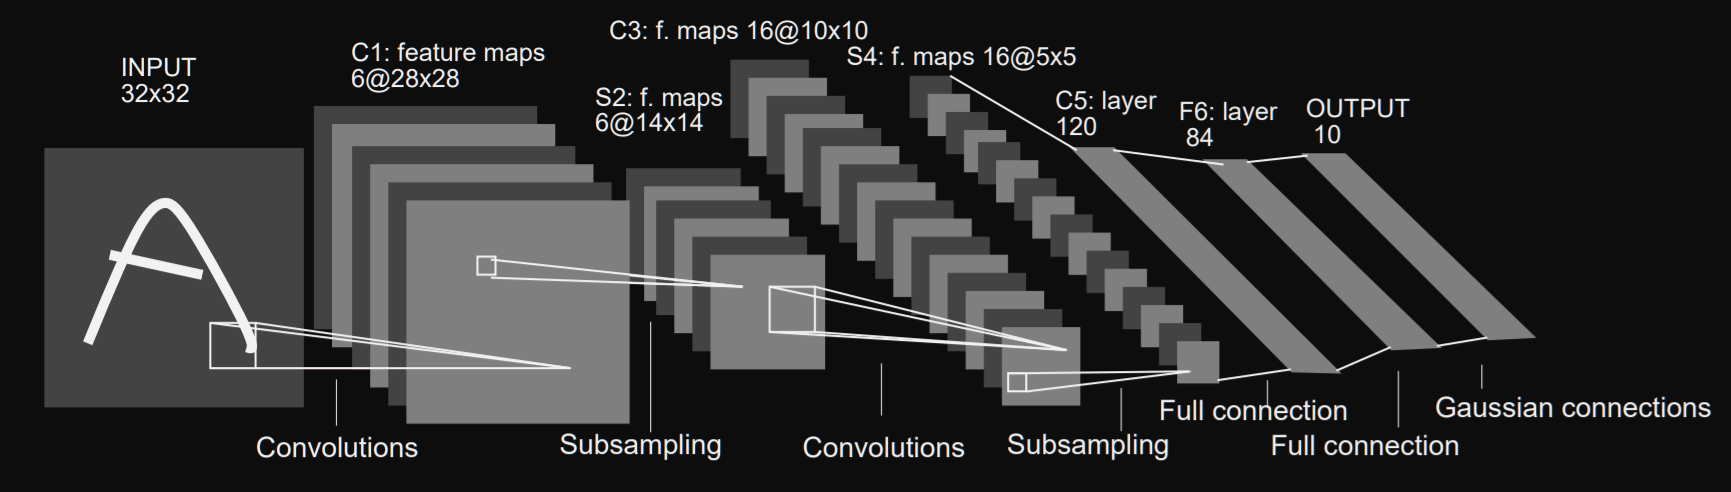

The daigram above shows the architectural network of LeNet-5 from the original paper.

The first layer is the input layer -- this is generally not considered a layer of the network as nothing is learnt in this layer. The input layer is built to take in 32x32, and these are the dimensions of images that are passed into the next layer.Those who are familiar with the MNIST dataset will be aware that the MNIST dataset images have the dimensions 28x28.To get the MNIST images dimensions to meet the requirements of the input layer, the 28x28 images are padded.

The grayscale images used in the paper had thier pixel values normalized from 0 to 255, to values between -0.1 and 1.175.The reason for normalization is to ensure that the batch of images have a mean of 0 and a standard deviation of 1, the benifits of this is seen in the reduction in the amount of training time. In the image classification with LeNet-5 example below, we'll be normalizing the pixel values of the images to take on values 0 to 1.

### The LeNet-5 architecture utilizes two significant types of layer construct: convolutional layers and subsampling layers.

Within the research paper and the image below, convolutional layers are identified with the $C_{x}$ , and subsampling layers are identified with $S_{x}$. Where 'x' is the sequential position of the layer within the architecture.$F_{x}$ is used to identify fully connected layers.This method of layer identification can be seen in above image.

The official first layer convolutional layer c1 produces as output 6 feature maps, and has a kernel size of 5x5.The kernel/filter is the name given to the window that contains the weight values that are utilized during the convolution of the weight values with the input values.5x5 is also indicated of the local receptive field size each unit or neuron within a convolutional layer.The dimensions of the six feature maps the first convolution layer produces are 28x28.

A subsampling layer $s_{2}$ follows the $c_{1}$ layer.The $S_{2}$ layer halves the dimension of the feature maps it recieves from the previous layer; this is known commonly as downsampling.

The $S_{2}$ layer also produces 6 feature maps, each one corresponding to the feature amps passed as input from the previous layer.

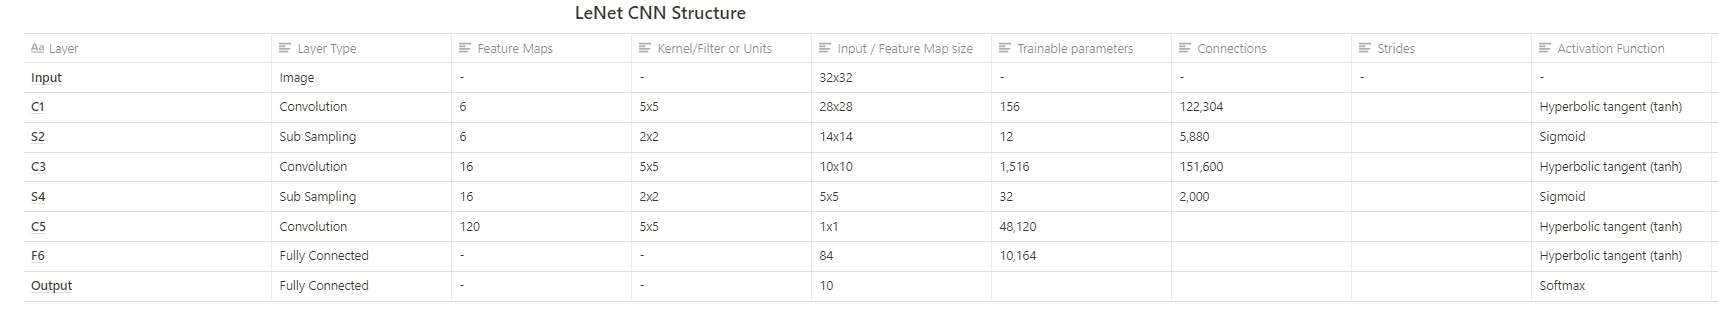

# LeNet5 Tensorflow Implementation

Let's implement LeNet5 in tensorflow:

- **Tensorflow:** An open-source platform for the implementation, training, and deplyement of machine learning models.

- **Keras:** An open-source library used for the implementation of neural network architectures that run on both cpu's and gpu's.

- **Numpy:** A library for numerical computation with n-dimensional arrays.

In [1]:
import tensorflow as tf
import keras
import numpy as np

Next we load the MNIST dataset using the keras library.The keras library has suite of datasets readily available for use with easy accessibility.

We are also required to partition the dataset into testing, validation and training.Here are some quick descriptions of each partition category.

- **Training Dataset:** This is the group of our dataset used to train the neural network directly. Training data refers to the dataset partition exposed to the neural network during training.

- **Validation Dataset:** This group of the dataset is utilized during training to access the performance of the network at various iterations.

- **Test Dataset:** This partition of the dataset evaluates the performance of our network after the completion of the training phase.

And we also need to normalize the dataset i.e. pixel values from 0-255 to 0-1.

In [3]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0

train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)

val_x = train_x[:5000]
val_y = train_y[:5000]

In the code snippet above, we expand the dimensions of the training and dataset. The reason we do this is that during the training and evaluation phases, the network expects the images to be presented within batches; the extra dimension is representative of the numbers of images in a batch.

# The code below is the main part where we implement the actual LeNet-5 based neural network.
Keras provides tools required to implement the classification model.Keras presents a Sequential API  for stacking layers of the neural network on top of eachother.

In [4]:
lenet_5_model = keras.models.Sequential([keras.layers.Conv2D(6, kernel_size=5, strides=1, activation='tanh', input_shape=train_x[0].shape, padding='same'),
                                         keras.layers.AveragePooling2D(),
                                         keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'),
                                         keras.layers.AveragePooling2D(),
                                         keras.layers.Flatten(),
                                         keras.layers.Dense(120, activation='tanh'),
                                         keras.layers.Dense(84, activation='tanh'),
                                         keras.layers.Dense(10, activation='softmax')])

In [5]:
lenet_5_model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [8]:
import os, time
root_logdir = os.path.join(os.curdir, "logs\\fit\\")

def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [9]:
lenet_5_model.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y), callbacks=[tensorboard_cb])

Epoch 1/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3998 - accuracy: 0.8825 - val_loss: 0.0857 - val_accuracy: 0.9732
Epoch 2/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0928 - accuracy: 0.9713 - val_loss: 0.0542 - val_accuracy: 0.9856
Epoch 3/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0593 - accuracy: 0.9818 - val_loss: 0.0356 - val_accuracy: 0.9906
Epoch 4/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0416 - accuracy: 0.9873 - val_loss: 0.0301 - val_accuracy: 0.9914
Epoch 5/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0362 - accuracy: 0.9892 - val_loss: 0.0237 - val_accuracy: 0.9926


In [10]:
lenet_5_model.evaluate(test_x, test_y)

313/313 [==============================] - 3s 11ms/step - loss: 0.0484 - accuracy: 0.9841


[0.04839791730046272, 0.9840999841690063]